In [1]:
import numpy as np
import cv2 as cv
from glob import glob
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
test_size=0.2
im_path='./image/*'

In [3]:
images=[]
labels=[]
color_means=[]
for path in glob(im_path):
    label = path.split('/')[-1].split('.')[0][0]
    image = cv.imread(path)
    image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    image = image/255.0
    images.append(image)
    labels.append(label)
    color_mean = cv.mean(image)
    color_means.append(color_mean[:-1])
labels=np.array(labels)
color_means=np.array(color_means)

In [4]:
train_data,test_data,train_label,test_label,train_images,test_images=train_test_split(color_means,labels,images,test_size=test_size)

array([[<Axes: xlabel='r', ylabel='r'>, <Axes: xlabel='g', ylabel='r'>,
        <Axes: xlabel='b', ylabel='r'>],
       [<Axes: xlabel='r', ylabel='g'>, <Axes: xlabel='g', ylabel='g'>,
        <Axes: xlabel='b', ylabel='g'>],
       [<Axes: xlabel='r', ylabel='b'>, <Axes: xlabel='g', ylabel='b'>,
        <Axes: xlabel='b', ylabel='b'>]], dtype=object)

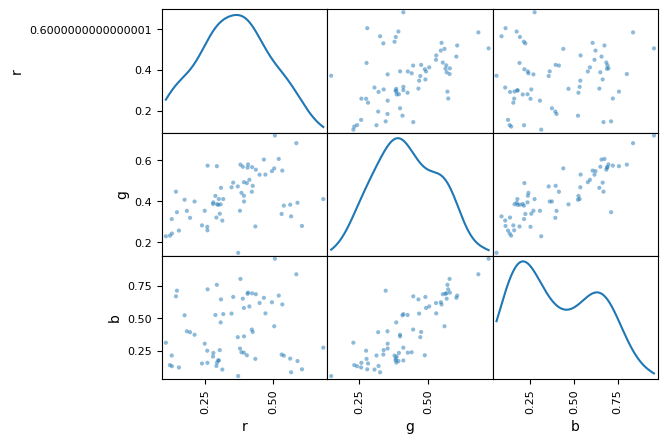

In [5]:
df = pd.DataFrame(train_data,columns=['r','g','b'])
pd.plotting.scatter_matrix(df,diagonal="kde")

array([[<Axes: xlabel='r', ylabel='r'>, <Axes: xlabel='g', ylabel='r'>,
        <Axes: xlabel='b', ylabel='r'>],
       [<Axes: xlabel='r', ylabel='g'>, <Axes: xlabel='g', ylabel='g'>,
        <Axes: xlabel='b', ylabel='g'>],
       [<Axes: xlabel='r', ylabel='b'>, <Axes: xlabel='g', ylabel='b'>,
        <Axes: xlabel='b', ylabel='b'>]], dtype=object)

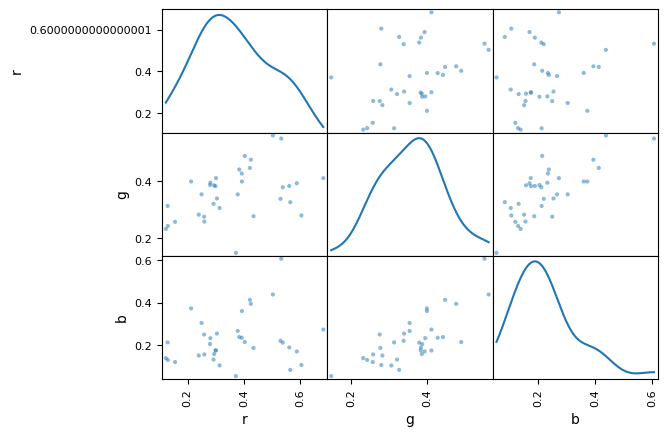

In [6]:
pd.plotting.scatter_matrix(df[train_label=='j'],diagonal="kde")

array([[<Axes: xlabel='r', ylabel='r'>, <Axes: xlabel='g', ylabel='r'>,
        <Axes: xlabel='b', ylabel='r'>],
       [<Axes: xlabel='r', ylabel='g'>, <Axes: xlabel='g', ylabel='g'>,
        <Axes: xlabel='b', ylabel='g'>],
       [<Axes: xlabel='r', ylabel='b'>, <Axes: xlabel='g', ylabel='b'>,
        <Axes: xlabel='b', ylabel='b'>]], dtype=object)

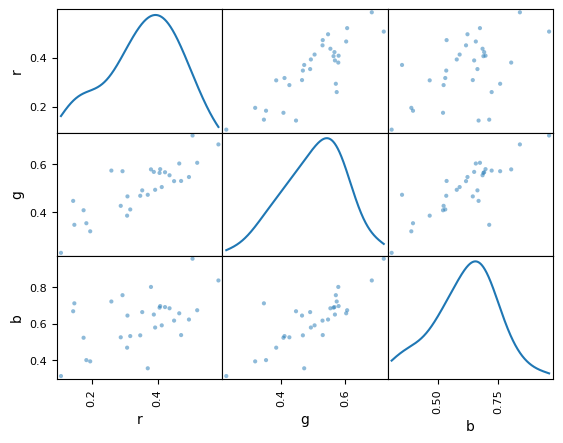

In [7]:
pd.plotting.scatter_matrix(df[train_label=='s'],diagonal="kde")

In [8]:
df.describe()

,r,g,b
count,65.000000,65.000000,65.000000
mean,0.359156,0.425087,0.406936
std,0.135548,0.120158,0.233402
min,0.107056,0.148528,0.055524
25%,0.279353,0.339505,0.205648
50%,0.371277,0.410939,0.372971
75%,0.435717,0.529911,0.622886
max,0.682133,0.721239,0.957681


In [9]:
means_j = np.mean(train_data[train_label=='j'],axis=0)
std_j = np.std(train_data[train_label=='j'],axis=0)
means_s = np.mean(train_data[train_label=='s'],axis=0)
std_s = np.std(train_data[train_label=='s'],axis=0)
num_of_data=train_data.shape[0]
num_of_j=np.count_nonzero(train_label=='j')
num_of_s = num_of_data-num_of_j
p_j = num_of_j/num_of_data
p_s = num_of_s/num_of_data

In [10]:
f_g = lambda x,s,m:np.exp(-0.5*(((x-m)/s)**2))/(s*np.sqrt(2*np.pi))

In [11]:
def predict(data):
    classes={0:'class_j',1:'class_s'}
    preds_if_j=1
    preds_if_s=1
    for i in range(len(means_j)):
        preds_if_j = preds_if_j*f_g(x=data[i],s=std_j[i],m=means_j[i])
        preds_if_s = preds_if_s*f_g(x=data[i],s=std_s[i],m=means_s[i])
    confid = preds_if_j*p_j - preds_if_s*p_s
    return classes[int(confid<0)],confid

In [12]:
pred=[]
confidence=[]
for sample in test_data:
    predinction,confid=predict(sample)
    pred.append(predinction[-1])
    confidence.append(confid)

In [13]:
prediction_dict={'jj':0,'js':1,'sj':2,'ss':3}
confusion_matrix=[0,0,0,0]
confidence_matrix=[0,0,0,0]
false_idx=[]
for i,p in enumerate(pred):
    section = prediction_dict[p+test_label[i]]
    if not p==test_label[i]:
        print(p,test_label[i])
        false_idx.append(i)
    confusion_matrix[section]+=1
    confidence_matrix[section]+=confidence[i]

s j


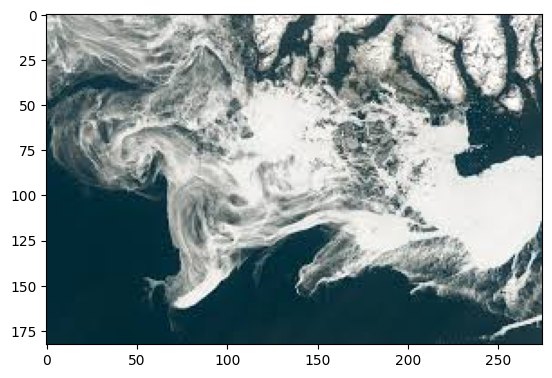

In [14]:
for f in false_idx:
    plt.imshow(images[f])
    plt.show()

In [15]:
print(f'confusion matrix: {confusion_matrix}')
print(f'confidence matrix: {confidence_matrix}')

confusion matrix: [6, 0, 1, 10]
confidence matrix: [71.03784792031773, 0, -0.41512138133265775, -61.146936476592515]


In [17]:
print(f'Precision: {confusion_matrix[0]/(confusion_matrix[0]+confusion_matrix[1])}')
print(f'Recall: {confusion_matrix[0]/(confusion_matrix[0]+confusion_matrix[2])}')
print(f'Accuracy: {(confusion_matrix[0]+confusion_matrix[3])/(sum(confusion_matrix))}')

Precision: 1.0
Recall: 0.8571428571428571
Accuracy: 0.9411764705882353


j s
s j
s j
s j
j s
s j
j s
j s


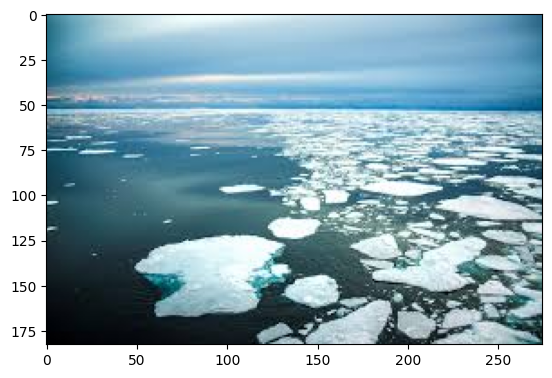

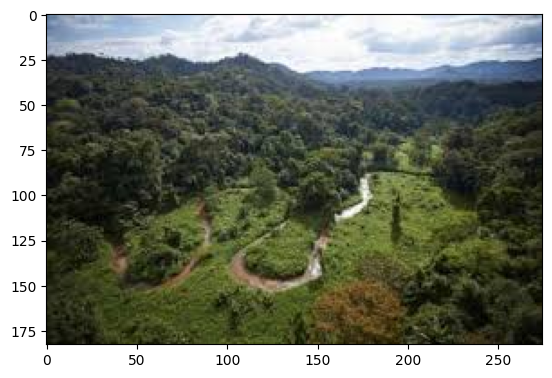

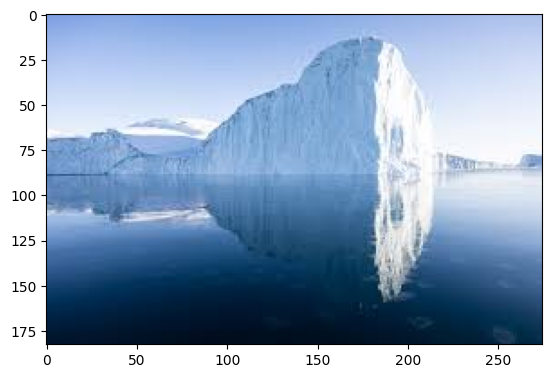

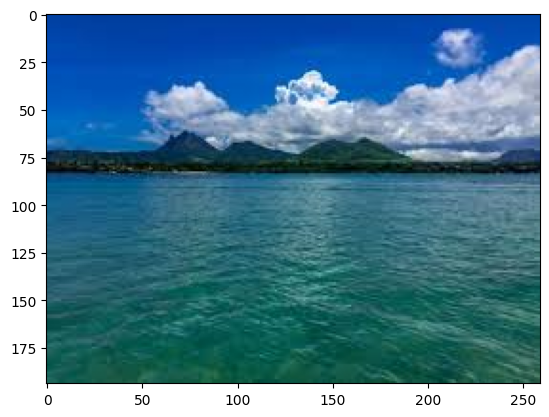

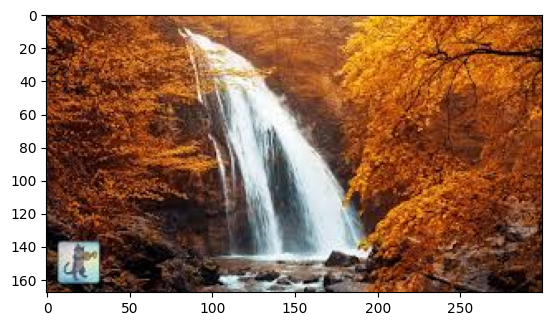

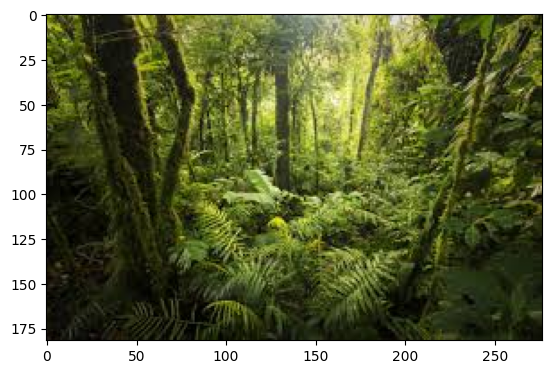

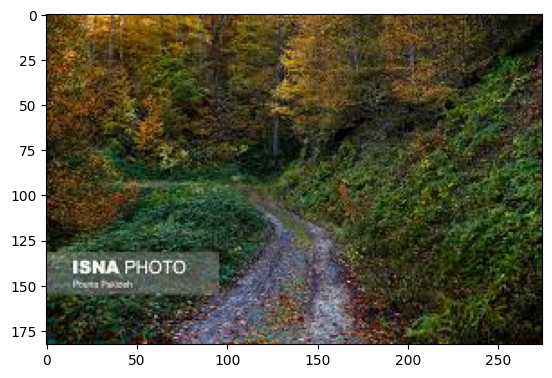

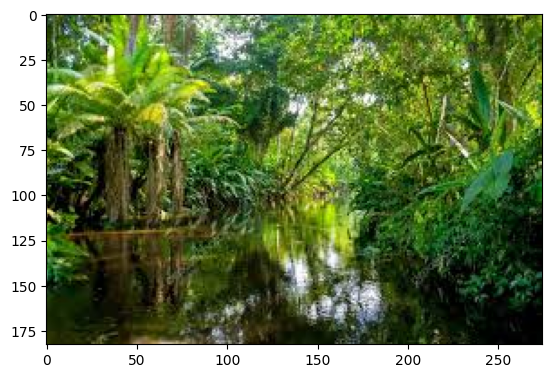

In [20]:
prediction_dict={'jj':0,'js':1,'sj':2,'ss':3}
pred=[]
confidence=[]
for sample in train_data:
    predinction,confid=predict(sample)
    pred.append(predinction[-1])
    confidence.append(confid)
confusion_matrix=[0,0,0,0]
confidence_matrix=[0,0,0,0]
false_idx=[]
for i,p in enumerate(pred):
    section = prediction_dict[p+train_label[i]]
    if not p==train_label[i]:
        print(p,train_label[i])
        false_idx.append(i)
    confusion_matrix[section]+=1
    confidence_matrix[section]+=confidence[i]
for f in false_idx:
    plt.imshow(images[f])
    plt.show()

In [21]:
print(f'confusion matrix: {confusion_matrix}')
print(f'confidence matrix: {confidence_matrix}')
print(f'Precision: {confusion_matrix[0]/(confusion_matrix[0]+confusion_matrix[1])}')
print(f'Recall: {confusion_matrix[0]/(confusion_matrix[0]+confusion_matrix[2])}')
print(f'Accuracy: {(confusion_matrix[0]+confusion_matrix[3])/(sum(confusion_matrix))}')

confusion matrix: [31, 4, 4, 26]
confidence matrix: [318.84446273575793, 9.841511294234783, -8.652173668456378, -205.01739548593446]
Precision: 0.8857142857142857
Recall: 0.8857142857142857
Accuracy: 0.8769230769230769
